<a href="https://colab.research.google.com/github/Altemir1/ETH-LSTM-based-trading-system/blob/main/crypto_technical_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing raw dataset into dataframe**

In [1]:
import pandas as pd

df = pd.read_csv("ETHUSDT_1d_candlesticks.csv")

df.head()

,Open Time,Open,High,Low,Close,Volume
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542


**Renaming columns in low case**.

In [2]:
df.rename(columns={"Open Time": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"}, inplace=True)

**Transform volume into usd format.**

---
Volume in dataset is presented in number of tokens



In [3]:
df["volume_usd"] = df["volume"] * df["close"]

# Technical Indicators

In [4]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a495c0c9b18f9d1eedbdd8b526d43cac4acf1c2cdee874b2163e48600c2f80d9
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [5]:
import ta

Trend indicators

In [6]:
# Simple moving average
df["sma_20"] = ta.trend.sma_indicator(df["close"], window=20)

# Exponential moving average
df["ema_20"] = ta.trend.ema_indicator(df["close"], window=20)

# Moving average convergence divergence
df["macd"] = ta.trend.macd(df["close"])

Momentum indicators

In [8]:
# Relativae strength index
df["rsi"] = ta.momentum.rsi(df["close"])

# Stochaistic oscialtor
df["stoch"] = ta.momentum.stoch(df["high"], df["low"], df["close"])

Volatility indicators

In [9]:
# Bollinger bands
bb = ta.volatility.BollingerBands(df['close'], window=20)
df['bollinger_hband'] = bb.bollinger_hband()
df['bollinger_lband'] = bb.bollinger_lband()

# Average true range
df["atr"] = ta.volatility.AverageTrueRange(df["high"], df["low"], df["close"]).average_true_range()

Volume based indicators

In [10]:
# On-balance volume
df["obv"] = ta.volume.on_balance_volume(df["close"], df["volume_usd"])

### Test for redundancy

Changing date format for correlation analysis

In [15]:
df["year"] = df["date"].apply(lambda x: x.split("-")[0])
df["month"] = df["date"].apply(lambda x: x.split("-")[1])
df["day"] = df["date"].apply(lambda x: x.split("-")[2])

In [18]:
df.drop(columns=["date"], inplace=True)

In [19]:
df.head()

,open,high,low,close,volume,volume_usd,sma_20,ema_20,macd,rsi,stoch,bollinger_hband,bollinger_lband,atr,obv,year,month,day
0,301.13,312.18,298.00,302.00,7030.71034,2.123275e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.123275e+06,2017,08,17
1,302.00,311.79,283.94,293.96,9537.84646,2.803745e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-6.804708e+05,2017,08,18
2,293.31,299.90,278.00,290.91,2146.19773,6.243504e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.304821e+06,2017,08,19
3,289.41,300.53,282.85,299.10,2510.13871,7.507825e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-5.540387e+05,2017,08,20
4,299.10,346.52,294.60,323.29,5219.44542,1.687395e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.133356e+06,2017,08,21


Drop rows with null values

In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2715 entries, 25 to 2739
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             2715 non-null   float64
 1   high             2715 non-null   float64
 2   low              2715 non-null   float64
 3   close            2715 non-null   float64
 4   volume           2715 non-null   float64
 5   volume_usd       2715 non-null   float64
 6   sma_20           2715 non-null   float64
 7   ema_20           2715 non-null   float64
 8   macd             2715 non-null   float64
 9   rsi              2715 non-null   float64
 10  stoch            2715 non-null   float64
 11  bollinger_hband  2715 non-null   float64
 12  bollinger_lband  2715 non-null   float64
 13  atr              2715 non-null   float64
 14  obv              2715 non-null   float64
 15  year             2715 non-null   object 
 16  month            2715 non-null   object 
 17  day              2

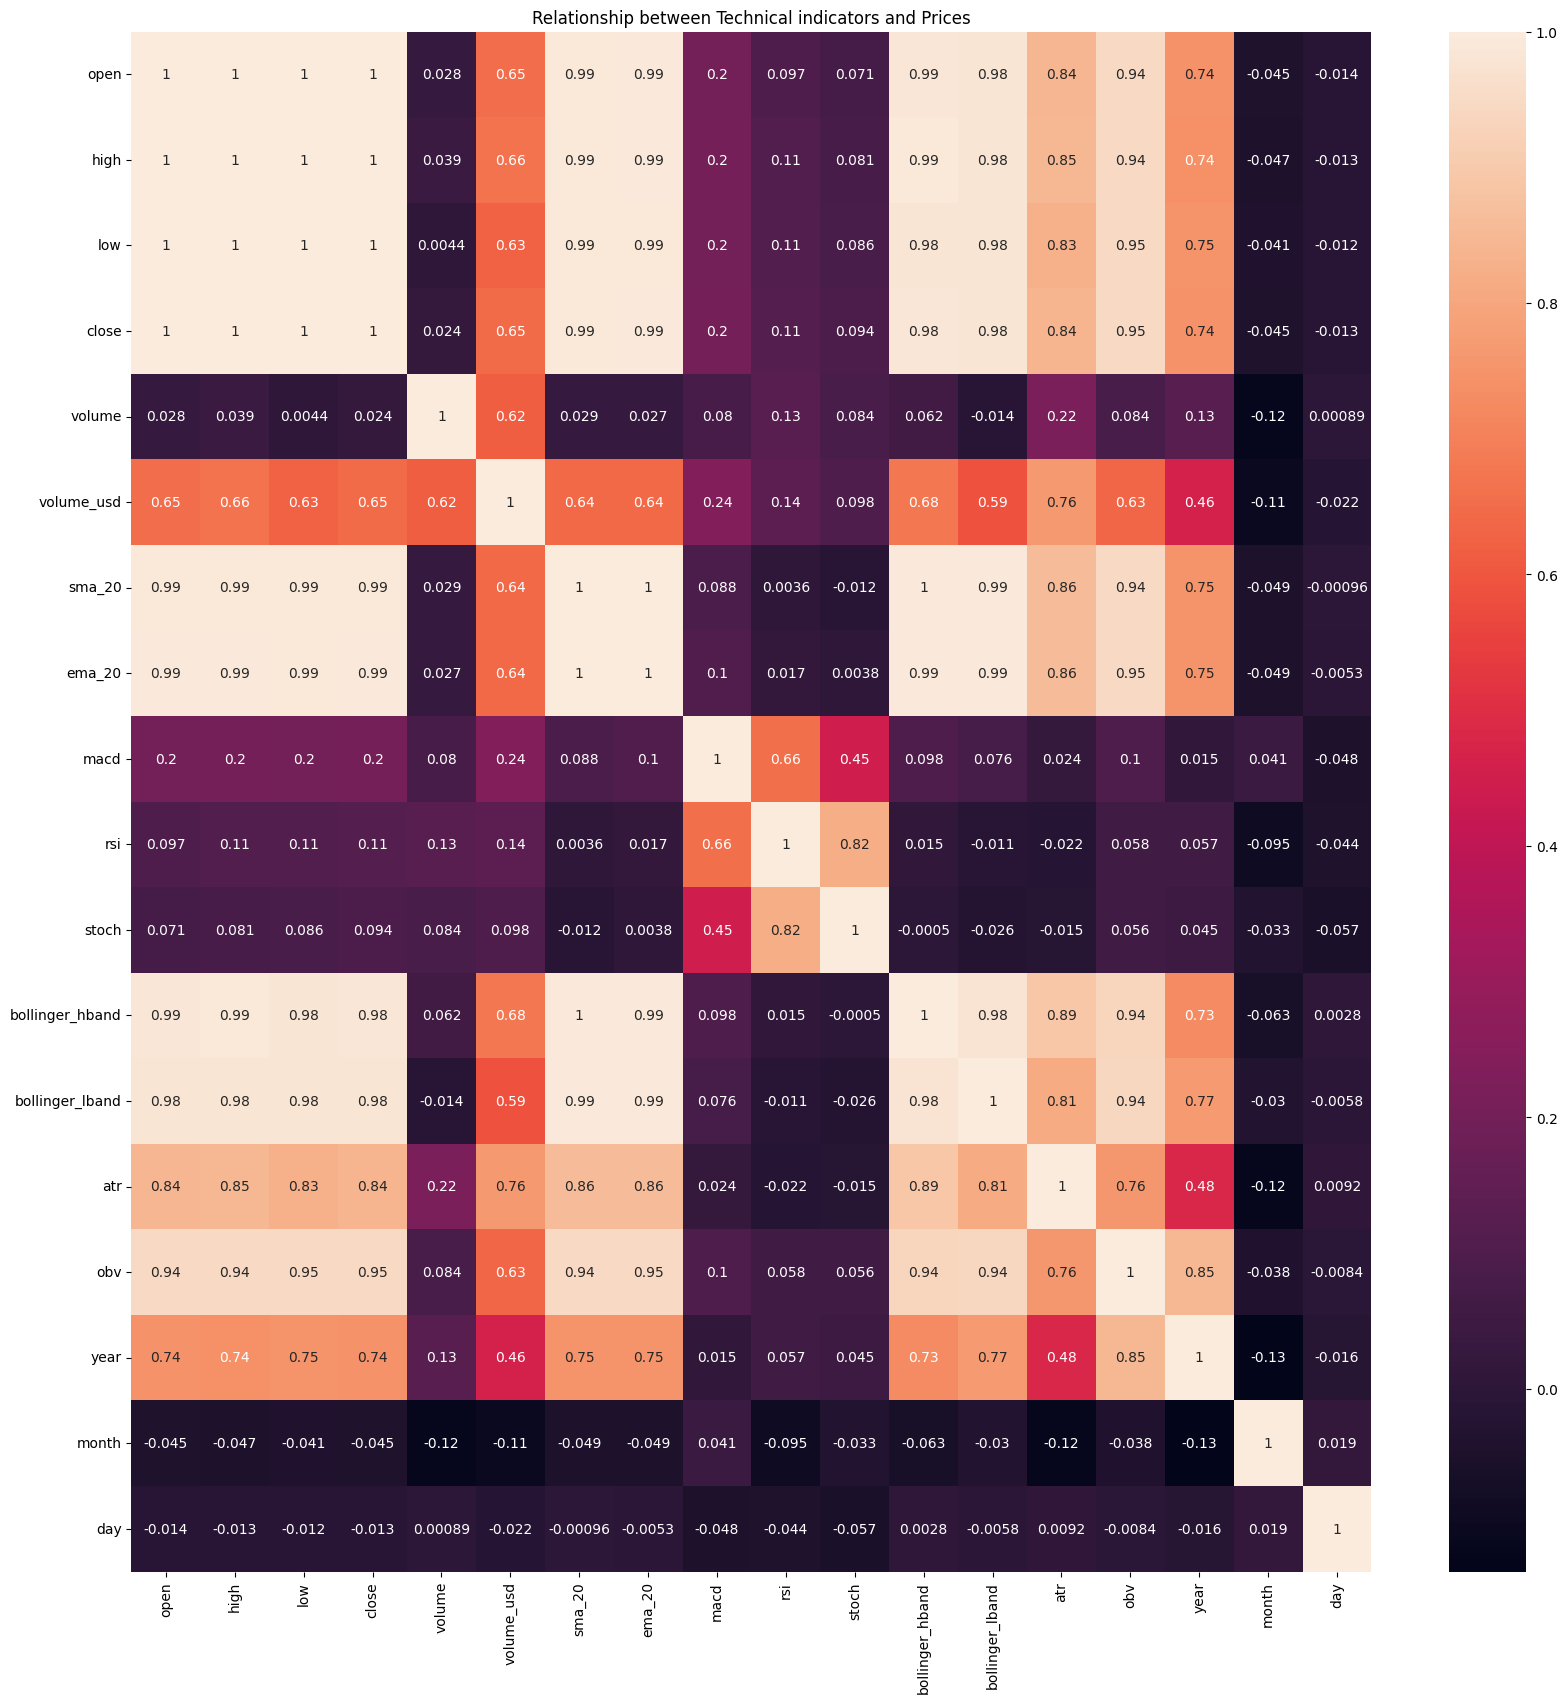

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.title("Relationship between Technical indicators and Prices")
plt.show()

In [25]:
df.drop(columns=["sma_20"], inplace = True)

### Conlusion

---

Delete simple moving average as it's hihly correlated with exponential moving average. Use all of other indicators for prediction.

In [26]:
df.to_csv("eth_ti_1d.csv")